# Hypothesis 2:
Crimes tend to increase around the holiday

import packages and read in csv

In [30]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
modified_boston = pd.read_csv('data_modified/modified_boston_crime.csv')

Create function for generate line chart with holidays labels.
Function is created by modifying codes in: https://www.kaggle.com/code/heesoo37/boston-crimes-starter-eda

In [31]:
def holiday_situation(year, modified_boston):
    grouped_date = modified_boston
    holidays = [year+'-01-01', # New Years Day
                         year+'-01-16', # MLK Day
                         year+'-03-17', # St. Patrick's Day
                         year+'-04-17', # Boston marathon
                         year+'-05-29', # Memorial Day
                         year+'-07-04', # Independence Day
                         year+'-09-04', # Labor Day
                         year+'-10-10', # Veterans Day
                         year+'-11-23', # Thanksgiving
                         year+'-12-25'] # Christmas
    holidays_names = ['NY','MLK','St Pats','Marathon','Mem','July 4','Labor','Vets','Thnx','Xmas']
    def helper(date):
        return date[:4]
    grouped_date['YEAR'] = grouped_date['OCCURRED_ON_DATE'].agg(helper)
    grouped_date = grouped_date[grouped_date['YEAR']==year]
    grouped_date = grouped_date.groupby(['OCCURRED_ON_DATE']).size().reset_index(name='count')
    fig, ax = plt.subplots(figsize=(20,6))
    sns.lineplot(x='OCCURRED_ON_DATE',
                y='count',
                ax=ax,
                data=grouped_date)
    plt.xlabel('year'+year)
    plt.vlines(holidays, 100, 350, alpha=1, color ='r')
    for i in range(len(holidays)):
        plt.text(x=holidays[i], y=352, s=holidays_names[i])

Generate line charts of year 2016, 2017 and 2018.

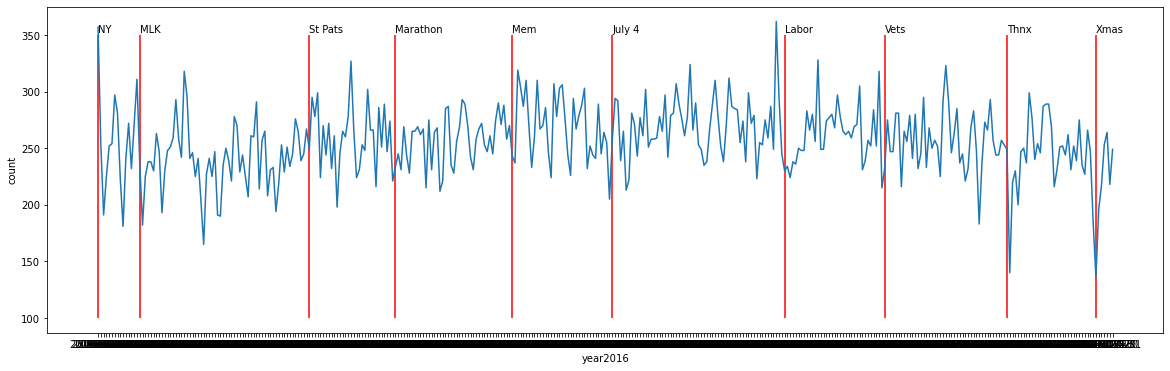

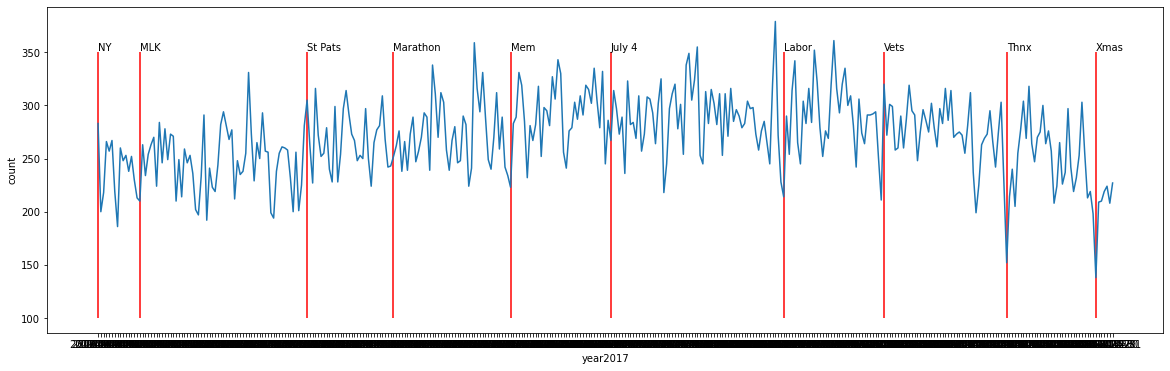

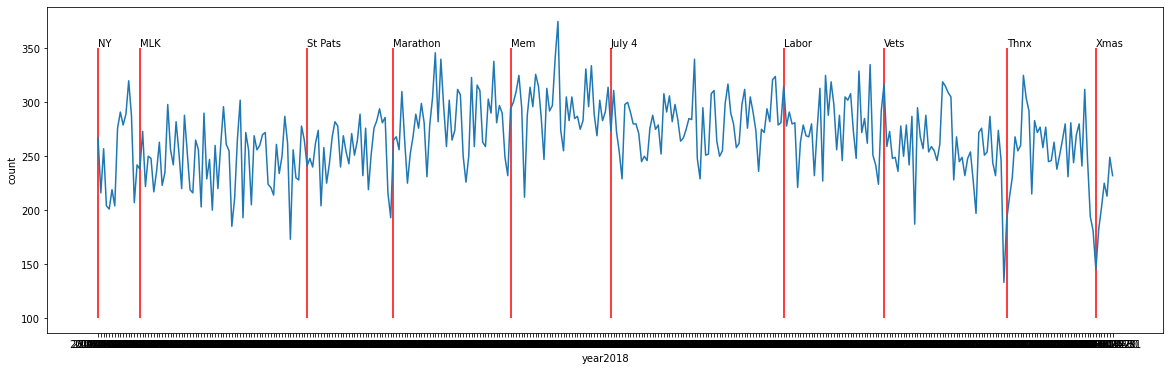

In [32]:
holiday_situation('2016',modified_boston)
holiday_situation('2017',modified_boston)
holiday_situation('2018',modified_boston)

# Conclusion:
Crimes tend to decrease during Christmas and Thanksgiving day

# Farther thinking:
Will the amount of various crimes change differently during hours, days or years?

Read in csv and reshape dataframe for hour, days and years.

In [33]:
df = pd.read_csv('data/boston_crime.csv')
grouped_df = df.groupby(['YEAR','OFFENSE_CODE_GROUP']).agg({'OFFENSE_CODE':'count'}).reset_index()
grouped_hour = df.groupby(['HOUR','OFFENSE_CODE_GROUP']).agg({'OFFENSE_CODE':'count'}).reset_index()
grouped_day = df.groupby(['DAY_OF_WEEK','OFFENSE_CODE_GROUP']).agg({'OFFENSE_CODE':'count'}).reset_index()
grouped_year = grouped_df.pivot("OFFENSE_CODE_GROUP", "YEAR", "OFFENSE_CODE")
grouped_day = grouped_day.pivot("OFFENSE_CODE_GROUP", "DAY_OF_WEEK", "OFFENSE_CODE")
grouped_hour = grouped_hour.pivot("OFFENSE_CODE_GROUP", "HOUR", "OFFENSE_CODE")

D:\anacoda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Show the heatmap of various crimes change by years.

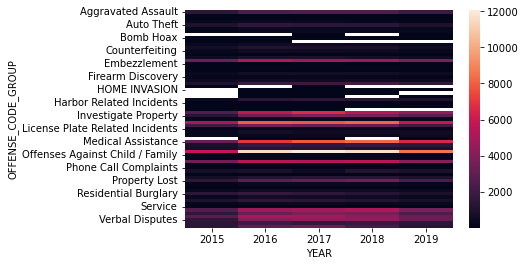

In [34]:
ax = sns.heatmap(grouped_year)

Show the heatmap of various crimes change by days.

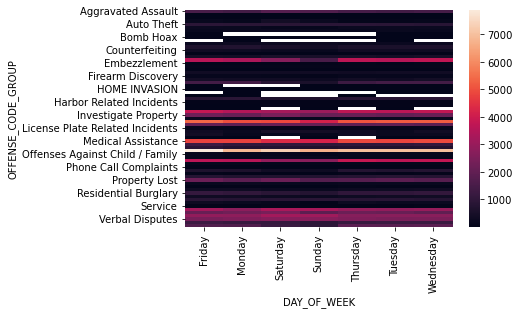

In [35]:
ax = sns.heatmap(grouped_day)

Show the heatmap of various crimes change by hours.

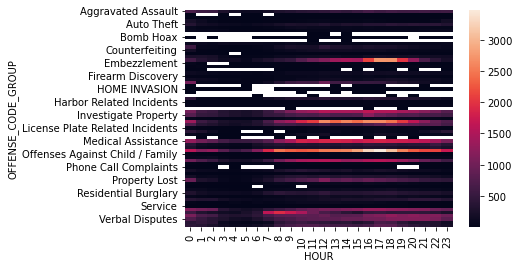

In [36]:
ax = sns.heatmap(grouped_hour)

# Conclusion:
Some types of crimes such as offenses against children/family and investigate property change differently during hours.